In [1]:
import model_selection as ms 

# PREREQUISITES

In the examples shown in this document, the air pollution datasets of EEA will be used. For this reason, the [EEA-datasets-handler](https://github.com/EnricoPittini/EEA-datasets-handler) library will be used.

In particular,the PM10 mean concentrations in Italy are considered, with respect to 2020.

In [2]:
import EEA_datasets_handler as eea

In [ ]:
# Download the datasets 
# IT'S NECESSARY ONLY IF THEY HAVEN'T BEEN DOWNLOADED YET
dest_path = "C:\\Datasets"
countries_cities_dict = {"IT": "all"} 
pollutants = ["PM10"] 
years = [2020]
eea.download_datasets(dest_path, countries_cities_dict, pollutants, years)

In [3]:
# Load the datasets
source_path = "C:\\Datasets\\EEA"
countries_cities_dict = {"IT":"all"}
pollutants = ["PM10"]
years = [2020]
df = eea.load_datasets(source_path,countries_cities_dict,pollutants,years)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157640 entries, 0 to 157639
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Countrycode               157640 non-null  object 
 1   Namespace                 157640 non-null  object 
 2   AirQualityNetwork         157640 non-null  object 
 3   AirQualityStation         157640 non-null  object 
 4   AirQualityStationEoICode  157640 non-null  object 
 5   SamplingPoint             157640 non-null  object 
 6   SamplingProcess           157640 non-null  object 
 7   Sample                    157565 non-null  object 
 8   AirPollutant              157640 non-null  object 
 9   AirPollutantCode          157640 non-null  object 
 10  AveragingTime             157640 non-null  object 
 11  Concentration             132617 non-null  float64
 12  UnitOfMeasurement         157640 non-null  object 
 13  DatetimeBegin             157640 non-null  o

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
0,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,54.000000,µg/m3,2020-01-11 00:00:00 +01:00,2020-01-12 00:00:00 +01:00,1,3
1,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,54.000000,µg/m3,2020-01-12 00:00:00 +01:00,2020-01-13 00:00:00 +01:00,1,3
2,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,80.000000,µg/m3,2020-01-13 00:00:00 +01:00,2020-01-14 00:00:00 +01:00,1,3
3,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,93.000000,µg/m3,2020-01-14 00:00:00 +01:00,2020-01-15 00:00:00 +01:00,1,3
4,IT,IT.ISPRA.AQD,NET.IT224A,STA.IT1523A,IT1523A,SPO.IT1523A_5_BETA_2005-04-20_00:00:00,SPP.IT1523A_5_BETA_2005-04-20_00:00:00,SAM.IT1523A_5_BETA_2005-04-20_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,89.000000,µg/m3,2020-01-15 00:00:00 +01:00,2020-01-16 00:00:00 +01:00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157635,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,11.795832,µg/m3,2020-12-26 00:00:00 +01:00,2020-12-27 00:00:00 +01:00,1,3
157636,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,40.525830,µg/m3,2020-12-27 00:00:00 +01:00,2020-12-28 00:00:00 +01:00,1,3
157637,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,20.899164,µg/m3,2020-12-28 00:00:00 +01:00,2020-12-29 00:00:00 +01:00,1,3
157638,IT,IT.ISPRA.AQD,NET.IT100A,STA.IT2079A,IT2079A,SPO.IT2079A_5_BETA_2009-07-23_00:00:00,SPP.IT2079A_5_BETA_2009-07-23_00:00:00,SAM.IT2079A_5_BETA_2009-07-23_00:00:00,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,day,40.594994,µg/m3,2020-12-29 00:00:00 +01:00,2020-12-30 00:00:00 +01:00,1,3


In addition, it will be used the [timeSeries-processing](https://github.com/EnricoPittini/timeSeries-processing) library in order to process the time series datasets.

In [5]:
import timeSeries_processing as tsp

# UTILITIES

### PolynomialRegression

It's a simple class, compliant with the [sklearn estimators interface](https://scikit-learn.org/stable/developers/develop.html), which implements the polynomial regression.

In [6]:
model = ms.PolynomialRegression(degree=3)

### compute_train_val_test

In [7]:
df_mean,df_min,df_max = eea.preprocessing(df, fill=True, fill_n_days=10 ,fill_aggr="mean")

C:\Users\Enrico\Desktop\TirocinioTesi\CodiceGithub\EEA_datasets_handler.py:806: UserWarning: Missing days: ['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-10', '2020-02-11']
  warnings.warn("Missing days: "+str(list(missing_days.strftime('%Y-%m-%d'))))


In [10]:
df_mean_supp, X, y = tsp.add_k_previous_days(df_mean, col_name="mean", k=1, y_col="mean", scale_y=True)

In [12]:
train_score, val_score, test_score = ms.compute_train_val_test(X, y, model)
train_score, val_score, test_score

(0.010590308174761493, 0.011154041214801094, 0.011147349084587836)

In [ ]:
# Full signature
train_score, val_score, test_score = ms.compute_train_val_test(X, y, model, scale=False, test_size=0.2, time_series=False,
                                                               random_state=123, n_folds=5, regr=True)

### compute_bias_variance_error

In [15]:
bias2, variance, error = ms.compute_bias_variance_error(X, y, model)
bias2, variance, error

(0.010697516686507456, 0.0002482539041854526, 0.01094577059069291)

In [ ]:
# Full signature
bias2, variance, error = ms.compute_bias_variance_error(X, y, model, scale=False, N_TESTS = 20, sample_size=0.67)

### plot_predictions

<AxesSubplot:title={'center':'Actual vs Predicted values'}, xlabel='Index'>

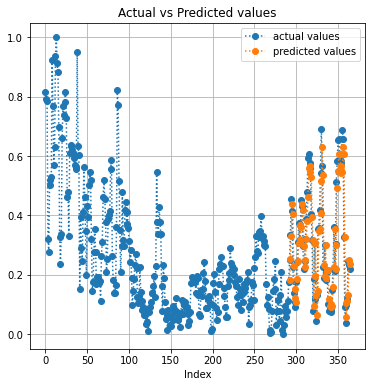

In [20]:
ms.plot_predictions(X, y, model)

<AxesSubplot:title={'center':'Actual vs Predicted values'}, xlabel='Actual values', ylabel='Predicted values'>

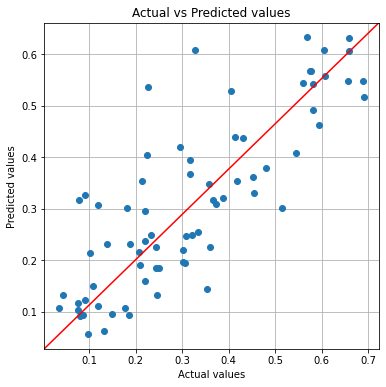

In [18]:
ms.plot_predictions(X, y, model, plot_type=1)

In [ ]:
# Full signature
ms.plot_predictions(X, y, model, scale=False, test_size=0.2, plot_type=0, xvalues=None, xlabel="Index",
                 title="Actual vs Predicted values", figsize=(6,6))

# FUNCTIONS THAT PERFORM THE MODEL SELECTION WITH RESPECT TO A SINGLE DATASET

Create the single dataset.

In [3]:
df_mean,df_min,df_max = eea.preprocessing(df, fill=True, fill_n_days=10 ,fill_aggr="mean")

C:\Users\Enrico\Desktop\TirocinioTesi\CodiceGithub\EEA_datasets_handler.py:809: UserWarning: Missing days: ['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-10', '2020-02-11']
  warnings.warn("Missing days: "+str(list(missing_days.strftime('%Y-%m-%d'))))


In [4]:
df_mean_supp, X, y = tsp.add_k_previous_days(df_mean, col_name="mean", k=1, y_col="mean", scale_y=True)

### hyperparameter_validation

It selects the best value for the specified hyperparameter of the specified model on the given dataset.

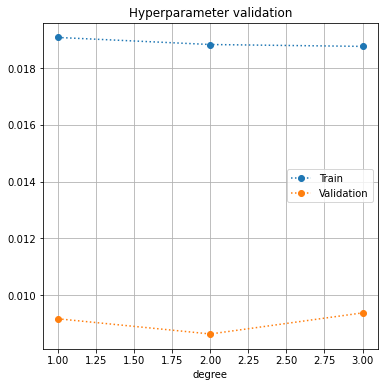

In [53]:
model = ms.PolynomialRegression() 

hyperparameter = "degree"
hyperparameter_values = [1,2,3]

train_val_scores, best_index, test_score, ax = ms.hyperparameter_validation(X, y, model, hyperparameter, hyperparameter_values, 
                                                                     time_series=True, plot=True, plot_train=True)

In [17]:
print(train_val_scores)

[[0.01907515 0.00917335]
 [0.01882686 0.00863946]
 [0.01876097 0.0093821 ]]


In [18]:
print(best_index)

1


In [19]:
print(test_score)

0.011503918056149346


In [ ]:
# Full signature
train_val_scores, best_index, test_score, ax = ms.hyperparameter_validation(X, y, model, hyperparameter, hyperparameter_values, 
                                                                     scale=False, test_size=0.2, time_series=False, 
                                                                     random_state=123, n_folds=5, regr=True, plot=False,
                                                                     plot_train=False, xvalues=None, xlabel=None,
                                                                     title="Hyperparameter validation", figsize=(6,6))

### hyperparameters_validation

It selects the best combination of values for the specified hyperparameters of the specified model on the given dataset.

In [55]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

param_grid = {"max_leaf_nodes":[2,3,4],"max_features":[None,"sqrt"]}

params, train_val_scores, best_index, test_score = ms.hyperparameters_validation(X, y, model, param_grid, time_series=True)

In [56]:
print(params)

[{'max_features': None, 'max_leaf_nodes': 2}, {'max_features': None, 'max_leaf_nodes': 3}, {'max_features': None, 'max_leaf_nodes': 4}, {'max_features': 'sqrt', 'max_leaf_nodes': 2}, {'max_features': 'sqrt', 'max_leaf_nodes': 3}, {'max_features': 'sqrt', 'max_leaf_nodes': 4}]


In [27]:
print(train_val_scores)

[[0.02625313 0.02248355]
 [0.02159088 0.02162117]
 [0.01829289 0.01602048]
 [0.02625313 0.02248355]
 [0.02159088 0.02162117]
 [0.01829289 0.01602048]]


In [28]:
print(best_index)

2


In [29]:
print(test_score)

0.015266789104509664


In [ ]:
# Full signature
params, train_val_scores, best_index, test_score = ms.hyperparameters_validation(X, y, model, param_grid, scale=False, 
                                                                              test_size=0.2, time_series=False, 
                                                                              random_state=123, n_folds=5, regr=True)

### models_validation

It selects the best model on the given dataset.

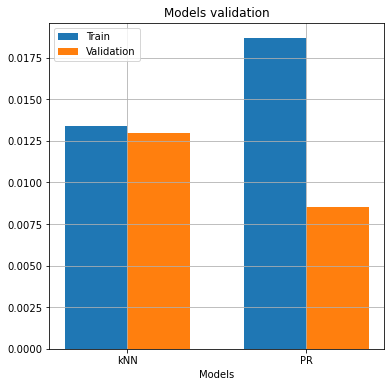

In [22]:
from sklearn.neighbors import KNeighborsRegressor

model_paramGrid_list = [ 
                         ("kNN", KNeighborsRegressor(),{"n_neighbors":[1,2,3],"weights":["uniform","distance"]}),
                         ("PR", ms.PolynomialRegression(),{"degree":[1,2,3]}),
                       ]


models_train_val_score, models_best_params, best_index, test_score, ax = ms.models_validation(X, y, model_paramGrid_list,
                                                                                       scale_list=[True,False], 
                                                                                       time_series=True, plot=True,
                                                                                       plot_train=True)

In [39]:
print(models_train_val_score)

[[0.01414521 0.01280187]
 [0.01882686 0.00863946]]


In [40]:
print(models_best_params)

[{'n_neighbors': 3, 'weights': 'uniform'}, {'degree': 2}]


In [41]:
print(best_index)

1


In [42]:
print(test_score)

0.011503918056149346


In [ ]:
# Full signature
models_train_val_score, models_best_params, best_index, test_score, ax =  ms.models_validation(X, y, model_paramGrid_list, 
                                                                                        scale_list=None, test_size=0.2, 
                                                                                        time_series=False, random_state=123, 
                                                                                        n_folds=5, regr=True, plot=False,
                                                                                        plot_train=False, xvalues=None, 
                                                                                        xlabel="Models",
                                                                                        title="Models validation",figsize=(6,6))

# FUNCTIONS THAT PERFORM THE MODEL SELECTION WITH RESPECT TO MULTIPLE DATASETS

In [23]:
# First dataset
_, X1, y1 = tsp.add_k_previous_days(df_mean, col_name="mean", k=1, y_col="mean", scale_y=True)

In [24]:
# Second dataset
_, X1, y1 = tsp.add_k_previous_days(df_mean, col_name="mean", k=1, y_col="mean", scale_y=True)

In [25]:
# Third dataset
_, X3, y3 = tsp.add_k_previous_days(df_mean, col_name="mean", k=15, y_col="mean", scale_y=True)

### datasets_hyperparameter_validation

It selects the best dataset and the best value for the specified hyperparameter of the specified model (i.e. it selects the best
couple dataset-hyperparameter value).

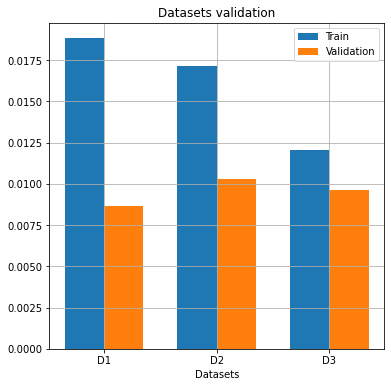

In [8]:
dataset_list = [(X1,y1),(X2,y2),(X3,y3)]

model = ms.PolynomialRegression()

hyperparameter = "degree"
hyperparameter_values = [1,2,3]

(datasets_train_val_score, datasets_best_hyperparameter_value, 
 best_index, test_score, axes) = ms.datasets_hyperparameter_validation(dataset_list, model, hyperparameter, 
                                                                       hyperparameter_values,
                                                                       time_series=True, plot=True, plot_train=True,
                                                                       xvalues=["D1","D2","D3"])

In [58]:
print(datasets_train_val_score)

[[0.01882686 0.00863946]
 [0.01713774 0.01030532]
 [0.012072   0.00963146]]


In [59]:
print(datasets_best_hyperparameter_value)

[2, 1, 1]


In [60]:
print(best_index)

0


In [61]:
print(test_score)

0.011503918056149346


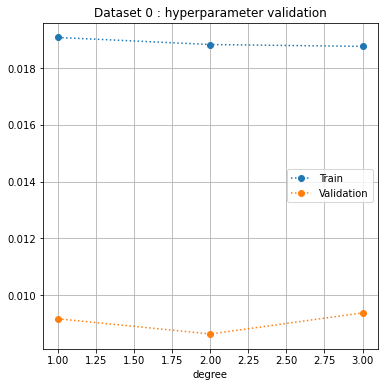

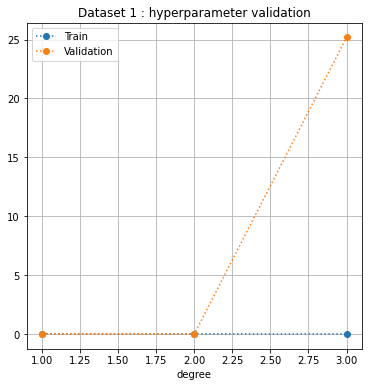

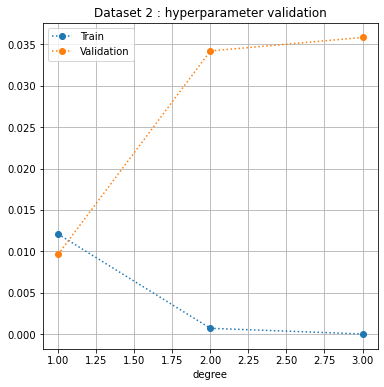

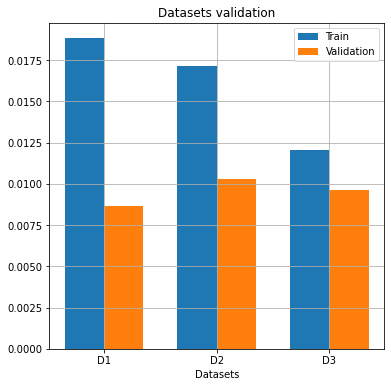

In [9]:
# verbose = True

dataset_list = [(X1,y1),(X2,y2),(X3,y3)]

model = ms.PolynomialRegression()

hyperparameter = "degree"
hyperparameter_values = [1,2,3]

(datasets_train_val_score, datasets_best_hyperparameter_value, 
 best_index, test_score, axes) = ms.datasets_hyperparameter_validation(dataset_list, model, hyperparameter, 
                                                                       hyperparameter_values,
                                                                       time_series=True, plot=True, plot_train=True,
                                                                       xvalues=["D1","D2","D3"], verbose=True)

In [ ]:
# Full signature
(datasets_train_val_score, datasets_best_hyperparameter_value, 
 best_index, test_score, axes) = ms.datasets_hyperparameter_validation(dataset_list, model, hyperparameter,
                                                                       hyperparameter_values, scale=False, test_size=0.2, 
                                                                       time_series=False, random_state=123, n_folds=5, 
                                                                       regr=True, plot=False, plot_train=False, xvalues=None, 
                                                                       xlabel="Datasets", title="Datasets validation", 
                                                                       figsize=(6,6) ,verbose=False, figsize_verbose=(6,6))

### datasets_hyperparameters_validation

It selects the best dataset and the best combination of values for the specified hyperparameters of the specified model (i.e.
it selects the best couple dataset-combination of hyperparameters values).

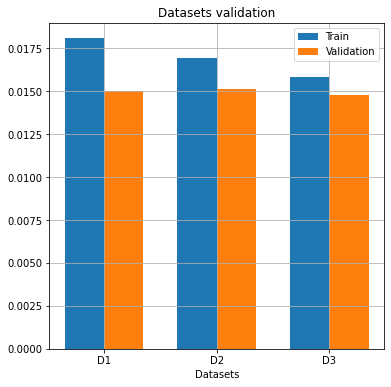

In [27]:
from sklearn.tree import DecisionTreeRegressor

dataset_list = [(X1,y1),(X2,y2),(X3,y3)]

model = DecisionTreeRegressor()

param_grid = {"max_leaf_nodes":[2,3,4], "max_features":[None,"sqrt"]}

(datasets_train_val_score, datasets_best_params, 
 best_index, test_score, ax) = ms.datasets_hyperparameters_validation(dataset_list, model, param_grid, time_series=True,
                                                                   plot=True, plot_train=True, xvalues=["D1","D2","D3"])

In [28]:
print(datasets_train_val_score)

[[0.01808403 0.0150039 ]
 [0.01692864 0.0151333 ]
 [0.01580857 0.0147613 ]]


In [29]:
print(datasets_best_params)

[{'max_features': None, 'max_leaf_nodes': 4}, {'max_features': None, 'max_leaf_nodes': 4}, {'max_features': None, 'max_leaf_nodes': 4}]


In [30]:
print(best_index)

2


In [31]:
print(test_score)

0.01711360531135875


In [ ]:
# Full signature
(datasets_train_val_score, datasets_best_params,
 best_index, test_score, ax) = ms.datasets_hyperparameters_validation(dataset_list, model, param_grid, scale=False, 
                                                                  test_size=0.2, time_series=False,
                                                                  random_state=123, n_folds=5, regr=True, plot=False,
                                                                  plot_train=False, xvalues=None, xlabel="Datasets",
                                                                  title="Datasets validation",figsize=(6,6))

### datasets_models_validation

It selects the best dataset and the best model (i.e. it selects the best couple dataset-model).

*It's the most general function*

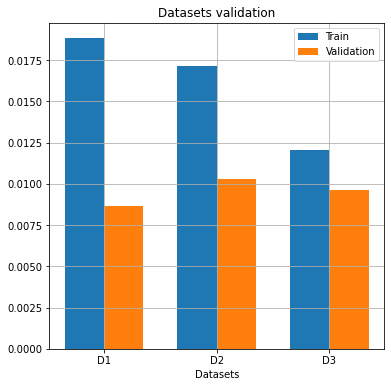

In [13]:
from sklearn.neighbors import KNeighborsRegressor

dataset_list = [(X1,y1),(X2,y2),(X3,y3)]

model_paramGrid_list = [ 
                         ("kNN" ,KNeighborsRegressor(),{"n_neighbors":[1,2,3],"weights":["uniform","distance"]}),
                         ("PR", ms.PolynomialRegression(),{"degree":[1,2,3]}),
                       ]

(datasets_train_val_score, datasets_best_model, 
 best_index, test_score, axes) = ms.datasets_models_validation(dataset_list, model_paramGrid_list, time_series=True, plot=True,
                                                                plot_train=True, xvalues=["D1","D2","D3"])

In [70]:
print(datasets_train_val_score)

[[0.01882686 0.00863946]
 [0.01713774 0.01030532]
 [0.012072   0.00963146]]


In [71]:
print(datasets_best_model)

[(1, 'PR', {'degree': 2}), (1, 'PR', {'degree': 1}), (1, 'PR', {'degree': 1})]


In [72]:
print(best_index)

0


In [73]:
print(test_score)

0.011503918056149346


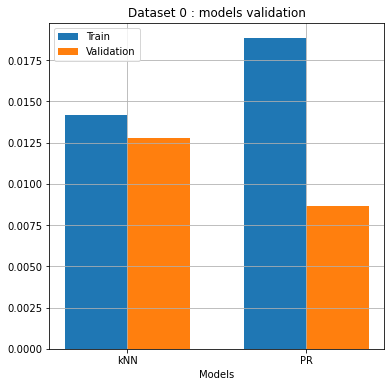

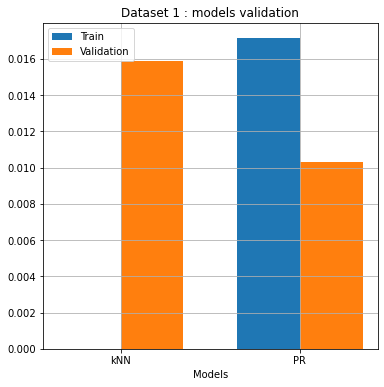

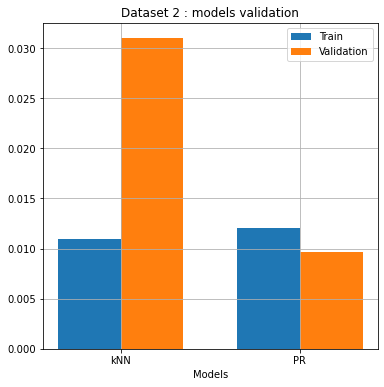

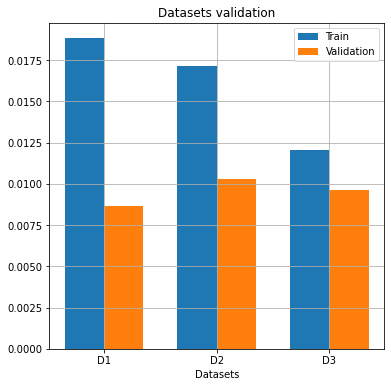

In [14]:
# verbose = True

from sklearn.neighbors import KNeighborsRegressor

dataset_list = [(X1,y1),(X2,y2),(X3,y3)]

model_paramGrid_list = [ 
                         ("kNN", KNeighborsRegressor(),{"n_neighbors":[1,2,3],"weights":["uniform","distance"]}),
                         ("PR", ms.PolynomialRegression(),{"degree":[1,2,3]}),
                       ]

(datasets_train_val_score, datasets_best_model, 
 best_index, test_score, axes) = ms.datasets_models_validation(dataset_list, model_paramGrid_list, time_series=True, plot=True,
                                                                plot_train=True, xvalues=["D1","D2","D3"], verbose=True)

In [ ]:
# Full signature
(datasets_train_val_score, datasets_best_model,
 best_index, test_score, axes) = ms.datasets_models_validation(dataset_list, model_paramGrid_list, scale_list=None, 
                                                               test_size=0.2, time_series=False, random_state=123, n_folds=5,
                                                               regr=True, plot=False, plot_train=False, xvalues=None,
                                                               xlabel="Datasets", title="Datasets validation", figsize=(6,6), 
                                                               verbose=False, figsize_verbose=(6,6))